# Thinning Algorithm

# 109323075 湯琦恩

# 1.ZS thinning algorithm

[3] 	T. Y. Zhang and C. Y. Suen. 1984. A fast parallel algorithm for thinning digital patterns. Commun. ACM 27, 3 (March 1984), 236–239. https://doi.org/10.1145/357994.358023

In [8]:
def thinImage(src, maxIterations=-1):
    assert len(src.shape) == 2, 'please binarify pictures'
    img_height, img_width = src.shape
    dst = src.copy()
    count = 0
    while True:
        count +=1
        if maxIterations != -1 and count > maxIterations:
            break
        mFlag = []
        #第一次迭代
        for i in range(img_height):
            for j in range(img_width):
                p1 = dst[i, j]
                #如果p1為0則不用計算(因為本來就沒有)
                if p1 != 1:
                    continue
                #定義p1的 8-neighborhood
                p4 = 0 if j == img_width-1 else dst[i, j+1]
                p8 = 0 if j == 0 else dst[i, j-1]
                p2 = 0 if i == 0 else dst[i-1, j]
                p3 = 0 if i == 0 or j == img_width-1 else dst[i-1, j+1]
                p9 = 0 if i == 0 or j == 0 else dst[i-1, j-1]
                p6 = 0 if i == img_height-1 else dst[i+1, j]
                p5 = 0 if i == img_height-1 or j == img_width-1 else dst[i+1, j+1]
                p7 = 0 if i == img_height-1 or j == 0 else dst[i+1, j-1]
                #條件(1) 2≤B(P1)≤6
                if p2+p3+p4+p5+p6+p7+p8+p9>=2 and p2+p3+p4+p5+p6+p7+p8+p9<=6:
                    ap = 0
                    #條件(2) A(P1)=1
                    if p2 == 0 and p3 ==1:
                        ap+=1
                    if p3 == 0 and p4 == 1:
                        ap+=1
                    if p4 ==0 and p5 == 1:
                        ap+=1
                    if p5 == 0 and p6 == 1:
                        ap+=1
                    if p6 == 0 and p7 == 1:
                        ap+=1
                    if p7 == 0 and p8 == 1:
                        ap+=1
                    if p8 == 0 and p9 == 1:
                        ap+=1
                    if p9 == 0 and p2 == 1:
                        ap+=1
                    #條件(3)P2×P4×P6=0 和 (4) P4×P6×P8=0
                    if ap == 1 and p2*p4*p6 == 0 and p4*p6*p8 == 0:
                        mFlag.append([i, j])
        #刪除所有符合條件的p1值
        for flag in mFlag:
            dst[flag[0], flag[1]] = 0
        if len(mFlag) == 0:
            break
        else:
            mFlag.clear()
        #第二次迭代
        for i in range(img_height):
            for j in range(img_width):
                p1 = dst[i, j]
                if p1 != 1:
                    continue
                p4 = 0 if j == img_width-1 else dst[i, j+1]
                p8 = 0 if j == 0 else dst[i, j-1]
                p2 = 0 if i == 0 else dst[i-1, j]
                p3 = 0 if i == 0 or j == img_width-1 else dst[i-1, j+1]
                p9 = 0 if i == 0 or j == 0 else dst[i-1, j-1]
                p6 = 0 if i == img_height-1 else dst[i+1, j]
                p5 = 0 if i == img_height-1 or j == img_width-1 else dst[i+1, j+1]
                p7 = 0 if i == img_height-1 or j == 0 else dst[i+1, j-1]
                #條件(1) 2≤B(P1)≤6
                if p2+p3+p4+p5+p6+p7+p8+p9>=2 and p2+p3+p4+p5+p6+p7+p8+p9<=6:
                    #條件(2) A(P1)=1
                    ap = 0
                    if p2 == 0 and p3 ==1:
                        ap+=1
                    if p3 == 0 and p4 == 1:
                        ap+=1
                    if p4 ==0 and p5 == 1:
                        ap+=1
                    if p5 == 0 and p6 == 1:
                        ap+=1
                    if p6 == 0 and p7 == 1:
                        ap+=1
                    if p7 == 0 and p8 == 1:
                        ap+=1
                    if p8 == 0 and p9 == 1:
                        ap+=1
                    if p9 == 0 and p2 == 1:
                        ap+=1
                    #條件(3)P2×P4×P8=0 和 (4) P2×P6×P8=0
                    if ap == 1 and p2*p4*p8 == 0 and p2*p6*p8 == 0:
                        mFlag.append([i, j])
        for flag in mFlag:
            dst[flag[0], flag[1]] = 0
        if len(mFlag) == 0:
            break
        else:
            mFlag.clear()
    return dst

In [2]:
import time
import cv2
import pylab as plt
import numpy

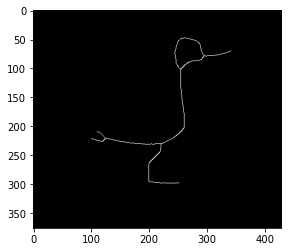

In [64]:
plt.imshow(img,cmap='gray')
plt.show()

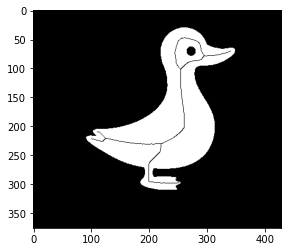

running 49.852753 s


In [12]:
if __name__ == '__main__':
    startTime = time.time()
    img = cv2.imread('duck.jpg', 0)
    _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)
    duck_zs = thinImage(thresh)
    res = cv2.subtract(thresh,duck_zs)
    plt.imshow(res,cmap='gray')
    plt.show()
    print('running %f s'%(time.time()-startTime))

# 2.The New thinning algorithm

[1] 	L. Ben Boudaoud, A. Sider and A. Tari, "A new thinning algorithm for binary images," 2015 3rd International Conference on Control, Engineering & Information Technology (CEIT), 2015, pp. 1-6, doi: 10.1109/CEIT.2015.7233099.

In [10]:
def new_thinImage(src, maxIterations=-1):
    assert len(src.shape) == 2, 'please binarify pictures'
    img_height, img_width = src.shape
    dst = src.copy()
    count = 0
    while True:
        count +=1
        if maxIterations != -1 and count > maxIterations:
            break
        mFlag = []
        #第一次迭代
        for i in range(img_height):
            for j in range(img_width):
                p1 = dst[i, j]
                #如果p1為0則不用計算(因為本來就沒有)
                if p1 != 1:
                    continue
                #定義p1的 8-neighborhood
                p4 = 0 if j == img_width-1 else dst[i, j+1]
                p8 = 0 if j == 0 else dst[i, j-1]
                p2 = 0 if i == 0 else dst[i-1, j]
                p3 = 0 if i == 0 or j == img_width-1 else dst[i-1, j+1]
                p9 = 0 if i == 0 or j == 0 else dst[i-1, j-1]
                p6 = 0 if i == img_height-1 else dst[i+1, j]
                p5 = 0 if i == img_height-1 or j == img_width-1 else dst[i+1, j+1]
                p7 = 0 if i == img_height-1 or j == 0 else dst[i+1, j-1]
                #條件(1)(i+j)mod2=0
                if (i+j)%2 ==0:
                    C = ((~p2 & (p3 | p4)) + (~p4 & (p5 | p6)) + (~p6 & (p7 | p8)) +(~p8 & (p9 | p2)))
                    #條件(2)C(p)=1
                    if C==1 :
                        B=p2+p3+p4+p5+p6+p7+p8+p9
                        #條件(3)2≤B(P_1)≤7
                        if 2<= B <=7:
                            #條件(4)P2×P4×P6=0 (5)P4×P6×P8=0
                            if p2*p4*p6 == 0 and p4*p6*p8 == 0:
                                mFlag.append([i, j])
        #刪除所有符合條件的p1值
        for flag in mFlag:
            dst[flag[0], flag[1]] = 0
        if len(mFlag) == 0:
            break
        else:
            mFlag.clear()
        #第二次迭代
        for i in range(img_height):
            for j in range(img_width):
                p1 = dst[i, j]
                if p1 != 1:
                    continue
                p4 = 0 if j == img_width-1 else dst[i, j+1]
                p8 = 0 if j == 0 else dst[i, j-1]
                p2 = 0 if i == 0 else dst[i-1, j]
                p3 = 0 if i == 0 or j == img_width-1 else dst[i-1, j+1]
                p9 = 0 if i == 0 or j == 0 else dst[i-1, j-1]
                p6 = 0 if i == img_height-1 else dst[i+1, j]
                p5 = 0 if i == img_height-1 or j == img_width-1 else dst[i+1, j+1]
                p7 = 0 if i == img_height-1 or j == 0 else dst[i+1, j-1]
                #條件(1)(i+j)mod2≠0
                if (i+j)%2 !=0:
                    C = ((~p2 & (p3 | p4)) + (~p4 & (p5 | p6)) + (~p6 & (p7 | p8)) +(~p8 & (p9 | p2)))
                    #條件(2)C(p)=1
                    if C==1 :
                        B=p2+p3+p4+p5+p6+p7+p8+p9
                        #條件(3)2≤B(P_1)≤7
                        if 2<= B <=7:
                            #條件(4)P2×P4×P8=0 (5)P2×P6×P8=0
                            if p2*p4*p8 == 0 and p2*p6*p8 == 0:
                                mFlag.append([i, j])
        for flag in mFlag:
            dst[flag[0], flag[1]] = 0
        if len(mFlag) == 0:
            break
        else:
            mFlag.clear()
    return dst

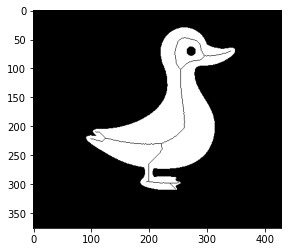

running 42.359932 s


In [15]:
if __name__ == '__main__':
    startTime = time.time()
    img = cv2.imread('duck.jpg', 0)
    _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)
    duck_new = new_thinImage(thresh)
    res = cv2.subtract(thresh,duck_new)
    plt.imshow(res,cmap='gray')
    plt.show()
    print('running %f s'%(time.time()-startTime))

# 3.Result

(1) The loss of connectivity of 2 ×2 square patterns

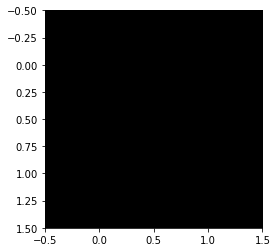

In [6]:
square= numpy.array([[1,1],[1,1]])
plt.imshow(square,cmap='gray')
plt.show()

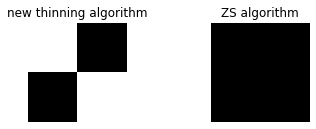

In [7]:
thinsquare = new_thinImage(square)
res1 = cv2.subtract(square,thinsquare)
zssquare = thinImage(square)
res3 = cv2.subtract(square,zssquare)

plt.subplot(221)
plt.title("new thinning algorithm")
plt.axis('off')
plt.imshow(res1,cmap='gray')
plt.subplot(222)
plt.title("ZS algorithm")
plt.axis('off')
plt.imshow(res3,cmap='gray')

(2)the excessive erosion of diagonal lines

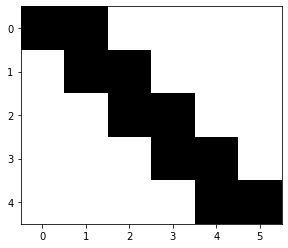

In [8]:
line136= numpy.array([[1,1,0,0,0,0],[0,1,1,0,0,0],[0,0,1,1,0,0],[0,0,0,1,1,0],[0,0,0,0,1,1]])
dst=1-line136
plt.imshow(dst,cmap='gray')
plt.show()

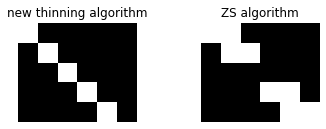

In [9]:
thinline136 = new_thinImage(line136)
zsline136 = thinImage(line136)
res = cv2.subtract(line136,thinline136)
res2 = cv2.subtract(line136,zsline136)
plt.subplot(221)
plt.title("new thinning algorithm")
plt.axis('off')
plt.imshow(res,cmap='gray')
plt.subplot(222)
plt.title("ZS algorithm")
plt.axis('off')
plt.imshow(res2,cmap='gray')

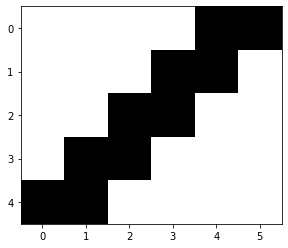

In [38]:
line45= numpy.array([[0,0,0,0,1,1],[0,0,0,1,1,0],[0,0,1,1,0,0],[0,1,1,0,0,0],[1,1,0,0,0,0]])
dst=1-line45
plt.imshow(dst,cmap='gray')
plt.show()

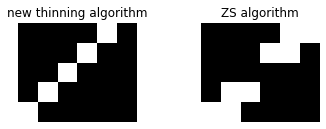

In [39]:
thinline45 = new_thinImage(line45)
zsline45 = thinImage(line45)
res = cv2.subtract(line45,thinline45 )
res2 = cv2.subtract(line45,zsline45)
plt.subplot(221)
plt.title("new thinning algorithm")
plt.axis('off')
plt.imshow(res,cmap='gray')
plt.subplot(222)
plt.title("ZS algorithm")
plt.axis('off')
plt.imshow(res2,cmap='gray')

# 4.Result on different type of Image

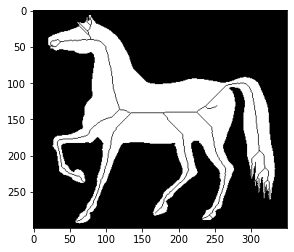

running 21.732010 s


In [12]:
if __name__ == '__main__':
    startTime = time.time()
    files = ['horse.jpg']
    for file in files:
        img = cv2.imread(file, 0)
        _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY)
        horse_new = new_thinImage(thresh)
        res = cv2.subtract(thresh,horse_new)
        plt.imshow(res,cmap='gray')
        plt.show()
    print('running %f s'%(time.time()-startTime))

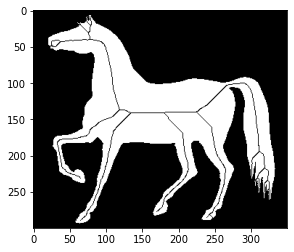

running 26.979544 s


In [13]:
if __name__ == '__main__':
    startTime = time.time()
    files = ['horse.jpg']
    for file in files:
        img = cv2.imread(file, 0)
        _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY)
        horse_zs = thinImage(thresh)
        res = cv2.subtract(thresh,horse_zs)
        plt.imshow(res,cmap='gray')
        plt.show()
    print('running %f s'%(time.time()-startTime))

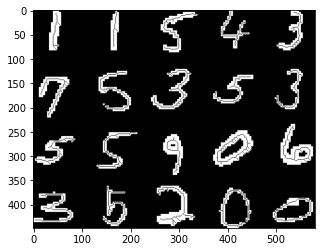

running 13.222194 s


In [14]:
if __name__ == '__main__':
    startTime = time.time()
    files = ['mnist_originals.jpg']
    for file in files:
        img = cv2.imread(file, 0)
        _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)
        mnist_new = new_thinImage(thresh)
        res = cv2.subtract(thresh,mnist_new)
        plt.imshow(res,cmap='gray')
        plt.show()
    print('running %f s'%(time.time()-startTime))

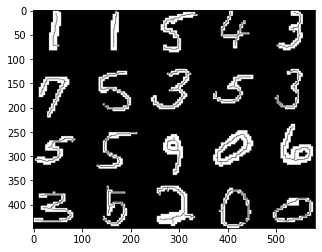

running 15.404268 s


In [15]:
if __name__ == '__main__':
    startTime = time.time()
    files = ['mnist_originals.jpg']
    for file in files:
        img = cv2.imread(file, 0)
        _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)
        mnist_zs = thinImage(thresh)
        res = cv2.subtract(thresh,mnist_zs)
        plt.imshow(res,cmap='gray')
        plt.show()
    print('running %f s'%(time.time()-startTime))

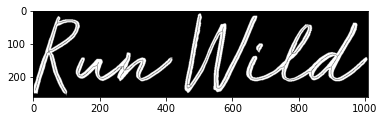

running 15.830708 s


In [16]:
if __name__ == '__main__':
    startTime = time.time()
    files = ['engligh_handwriting.jpg']
    for file in files:
        img = cv2.imread(file, 0)
        _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)
        engligh_zs = thinImage(thresh)
        res = cv2.subtract(thresh,engligh_zs)
        plt.imshow(res,cmap='gray')
        plt.show()
    print('running %f s'%(time.time()-startTime))

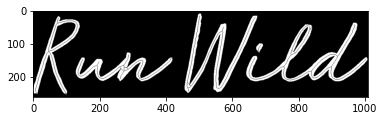

running 12.670694 s


In [17]:
if __name__ == '__main__':
    startTime = time.time()
    files = ['engligh_handwriting.jpg']
    for file in files:
        img = cv2.imread(file, 0)
        _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)
        engligh_new = new_thinImage(thresh)
        res = cv2.subtract(thresh,engligh_new)
        plt.imshow(res,cmap='gray')
        plt.show()
    print('running %f s'%(time.time()-startTime))

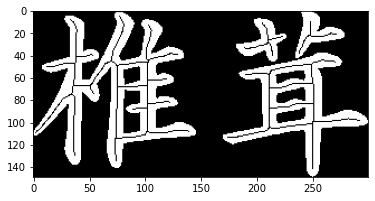

running 3.254853 s


In [18]:
if __name__ == '__main__':
    startTime = time.time()
    files = ['chinese_img.jpg']
    for file in files:
        img = cv2.imread(file, 0)
        _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY)
        chinese_zs = thinImage(thresh)
        res = cv2.subtract(thresh,chinese_zs)
        plt.imshow(res,cmap='gray')
        plt.show()
    print('running %f s'%(time.time()-startTime))

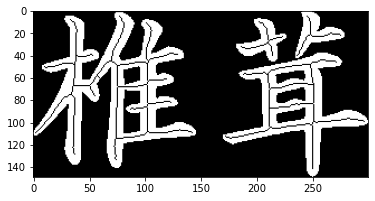

running 2.431353 s


In [19]:
if __name__ == '__main__':
    startTime = time.time()
    files = ['chinese_img.jpg']
    for file in files:
        img = cv2.imread(file, 0)
        _,thresh = cv2.threshold(img,127,1,cv2.THRESH_BINARY)
        chinese_new = new_thinImage(thresh)
        res = cv2.subtract(thresh,chinese_new)
        plt.imshow(res,cmap='gray')
        plt.show()
    print('running %f s'%(time.time()-startTime))

# 5.Performance Measures

In [20]:
def thinningRate(image):
    tc = 0
    row, col = image.shape
    tm2=4*pow(max(row, col)-1,2)
    for i in range(row):
            for j in range(col):
                p4 = 0 if j == col-1 else image[i, j+1]
                p8 = 0 if j == 0 else image[i, j-1]
                p2 = 0 if i == 0 else image[i-1, j]
                p3 = 0 if i == 0 or j == col-1 else image[i-1, j+1]
                p9 = 0 if i == 0 or j == 0 else image[i-1, j-1]
                t=((p8*p9) +(p9*p2)+(p2*p3)+(p3*p4))
                tc+=t
    
    tr=1-(tc/tm2)
    
    return tr

In [21]:
def SensiMeasure(image):
    s = 0
    row, col = image.shape
    for i in range(row):
            for j in range(col):
                p4 = 0 if j == col-1 else image[i, j+1]
                p8 = 0 if j == 0 else image[i, j-1]
                p2 = 0 if i == 0 else image[i-1, j]
                p3 = 0 if i == 0 or j == col-1 else image[i-1, j+1]
                p9 = 0 if i == 0 or j == 0 else image[i-1, j-1]
                p6 = 0 if i == row-1 else image[i+1, j]
                p5 = 0 if i == row-1 or j == col-1 else image[i+1, j+1]
                p7 = 0 if i == row-1 or j == 0 else image[i+1, j-1]
                ap = 0
                if p2 == 0 and p3 ==1:
                    ap+=1
                if p3 == 0 and p4 == 1:
                    ap+=1
                if p4 ==0 and p5 == 1:
                    ap+=1
                if p5 == 0 and p6 == 1:
                    ap+=1
                if p6 == 0 and p7 == 1:
                    ap+=1
                if p7 == 0 and p8 == 1:
                    ap+=1
                if p8 == 0 and p9 == 1:
                    ap+=1
                if p9 == 0 and p2 == 1:
                    ap+=1
                if ap>2:
                    s+=1
    
    return s

In [22]:
def ConnectMeasure(image):
    s = 0
    row, col = image.shape
    for i in range(row):
            for j in range(col):
                if image[i, j] != 1:
                    continue
                p4 = 0 if j == col-1 else image[i, j+1]
                p8 = 0 if j == 0 else image[i, j-1]
                p2 = 0 if i == 0 else image[i-1, j]
                p3 = 0 if i == 0 or j == col-1 else image[i-1, j+1]
                p9 = 0 if i == 0 or j == 0 else image[i-1, j-1]
                p6 = 0 if i == row-1 else image[i+1, j]
                p5 = 0 if i == row-1 or j == col-1 else image[i+1, j+1]
                p7 = 0 if i == row-1 or j == 0 else image[i+1, j-1]
                B=p2+p3+p4+p5+p6+p7+p8+p9
                if B<2:
                    s+=1
    
    return s

In [44]:
duckimg = cv2.imread("duck.jpg", 0)
_,duckthresh = cv2.threshold(duckimg,127,1,cv2.THRESH_BINARY_INV)
print("Thinning rate (TR)：","ZS thinning：",thinningRate(duck_zs),", the new thinning：",thinningRate(duck_new))
print("Sensitivity Measurement (SM)：","Original：",SensiMeasure(duckthresh),", ZS thinning：",SensiMeasure(duck_zs),", the new thinning：",SensiMeasure(duck_new))
print("Connectivity Measurement (CM)：","Original：",ConnectMeasure(duckthresh),", ZS thinning：",ConnectMeasure(duck_zs),", the new thinning：",ConnectMeasure(duck_new))

Thinning rate (TR)： ZS thinning： 0.9985342606341165 , the new thinning： 0.9988890951174775
Sensitivity Measurement (SM)： Original： 0 , ZS thinning： 4 , the new thinning： 10
Connectivity Measurement (CM)： Original： 0 , ZS thinning： 4 , the new thinning： 6


In [46]:
horseimg = cv2.imread("horse.jpg", 0)
_,horsethresh = cv2.threshold(horseimg,127,1,cv2.THRESH_BINARY)
print("Thinning rate (TR)：","ZS thinning：",thinningRate(horse_zs),", the new thinning：",thinningRate(horse_new))
print("Sensitivity Measurement (SM)：","Original：",SensiMeasure(horsethresh),", ZS thinning：",SensiMeasure(horse_zs),", the new thinning：",SensiMeasure(horse_new))
print("Connectivity Measurement (CM)：","Original：",ConnectMeasure(horsethresh),", ZS thinning：",ConnectMeasure(horse_zs),", the new thinning：",ConnectMeasure(horse_new))

Thinning rate (TR)： ZS thinning： 0.9951519281450891 , the new thinning： 0.9965845929015361
Sensitivity Measurement (SM)： Original： 1 , ZS thinning： 15 , the new thinning： 21
Connectivity Measurement (CM)： Original： 11 , ZS thinning： 19 , the new thinning： 20


In [47]:
mnistimg = cv2.imread("mnist_originals.jpg", 0)
_,mnistthresh = cv2.threshold(mnistimg,127,1,cv2.THRESH_BINARY_INV)
print("Thinning rate (TR)：","ZS thinning：",thinningRate(mnist_zs),", the new thinning：",thinningRate(mnist_new))
print("Sensitivity Measurement (SM)：","Original：",SensiMeasure(mnistthresh),", ZS thinning：",SensiMeasure(mnist_zs),", the new thinning：",SensiMeasure(mnist_new))
print("Connectivity Measurement (CM)：","Original：",ConnectMeasure(mnistthresh),", ZS thinning：",ConnectMeasure(mnist_zs),", the new thinning：",ConnectMeasure(mnist_new))

Thinning rate (TR)： ZS thinning： 0.9952452437574316 , the new thinning： 0.9963941736028538
Sensitivity Measurement (SM)： Original： 0 , ZS thinning： 32 , the new thinning： 178
Connectivity Measurement (CM)： Original： 0 , ZS thinning： 61 , the new thinning： 136


In [48]:
englighimg = cv2.imread("engligh_handwriting.jpg", 0)
_,englighthresh = cv2.threshold(englighimg,127,1,cv2.THRESH_BINARY_INV)
print("Thinning rate (TR)：","ZS thinning：",thinningRate(engligh_zs),", the new thinning：",thinningRate(engligh_new))
print("Sensitivity Measurement (SM)：","Original：",SensiMeasure(englighthresh),", ZS thinning：",SensiMeasure(engligh_zs),", the new thinning：",SensiMeasure(engligh_new))
print("Connectivity Measurement (CM)：","Original：",ConnectMeasure(englighthresh),", ZS thinning：",ConnectMeasure(engligh_zs),", the new thinning：",ConnectMeasure(engligh_new))

Thinning rate (TR)： ZS thinning： 0.9988424300227585 , the new thinning： 0.9992220658277682
Sensitivity Measurement (SM)： Original： 0 , ZS thinning： 20 , the new thinning： 38
Connectivity Measurement (CM)： Original： 0 , ZS thinning： 17 , the new thinning： 21


In [49]:
chineseimg = cv2.imread("chinese_img.jpg", 0)
_,chinesethresh = cv2.threshold(chineseimg,127,1,cv2.THRESH_BINARY_INV)
print("Thinning rate (TR)：","ZS thinning：",thinningRate(chinese_zs),", the new thinning：",thinningRate(chinese_new))
print("Sensitivity Measurement (SM)：","Original：",SensiMeasure(chinesethresh),", ZS thinning：",SensiMeasure(chinese_zs),", the new thinning：",SensiMeasure(chinese_new))
print("Connectivity Measurement (CM)：","Original：",ConnectMeasure(chinesethresh),", ZS thinning：",ConnectMeasure(chinese_zs),", the new thinning：",ConnectMeasure(chinese_new))

Thinning rate (TR)： ZS thinning： 0.9939821702218096 , the new thinning： 0.9946868603259471
Sensitivity Measurement (SM)： Original： 0 , ZS thinning： 30 , the new thinning： 50
Connectivity Measurement (CM)： Original： 5 , ZS thinning： 26 , the new thinning： 27
